In [13]:
import pickle
import os
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import open3d as o3d
import numpy as np
import imageio
from rich.progress import track
import matplotlib
import threading
from PIL import Image
from offroad.utils.gps import lla_to_utm, determine_utm_zone
import math


def quaternion_to_euler(input):
    """
    Convert a quaternion into euler angles (roll, pitch, yaw)
    roll is rotation around x-axis, pitch is rotation around y-axis
    and yaw is rotation around z-axis.
    """
    # Normalize the quaternion
    x, y, z, w = input
    magnitude = math.sqrt(x**2 + y**2 + z**2 + w**2)
    x, y, z, w = x / magnitude, y / magnitude, z / magnitude, w / magnitude

    # Roll (x-axis rotation)
    sinr_cosp = 2 * (w * x + y * z)
    cosr_cosp = 1 - 2 * (x**2 + y**2)
    roll = math.atan2(sinr_cosp, cosr_cosp)

    # Pitch (y-axis rotation)
    sinp = 2 * (w * y - z * x)
    if abs(sinp) >= 1:
        # Use 90 degrees if out of range
        pitch = math.copysign(math.pi / 2, sinp)
    else:
        pitch = math.asin(sinp)

    # Yaw (z-axis rotation)
    siny_cosp = 2 * (w * z + x * y)
    cosy_cosp = 1 - 2 * (y**2 + z**2)
    yaw = math.atan2(siny_cosp, cosy_cosp)

    return roll, pitch, yaw

In [14]:
file = "../data"

log_dir = "data-20231220-131337"

In [15]:
vesc_odom= []
zed2_imu = []
zed2_odom = []
for log_num in track(range(0, 304)):
    with open(os.path.join(file, log_dir, f"log{log_num}.pkl"), "rb") as f:
        data = pickle.load(f)
    for d_t in data:
        vesc_odom.append(quaternion_to_euler(d_t["vesc_odom"]['orientation']))
        zed2_odom.append(quaternion_to_euler(d_t["zed2_odom"]['orientation']))
        zed2_imu.append(quaternion_to_euler(d_t["imu"]['orientation']))


Output()

In [16]:
vesc_odom = np.array(vesc_odom)
zed2_odom = np.array(zed2_odom)
zed2_imu = np.array(zed2_imu)

Text(0.5, 1.0, 'roll')

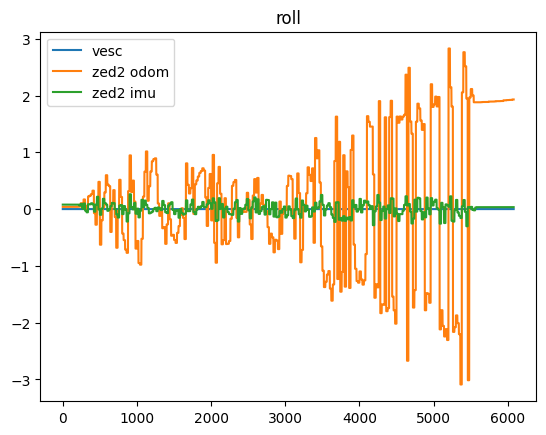

In [17]:

plt.plot(vesc_odom[:, 0], label="vesc")
plt.plot(zed2_odom[:, 0], label="zed2 odom")
plt.plot(zed2_imu[:, 0], label="zed2 imu")
plt.legend()
plt.title("roll")

Text(0.5, 1.0, 'pitch')

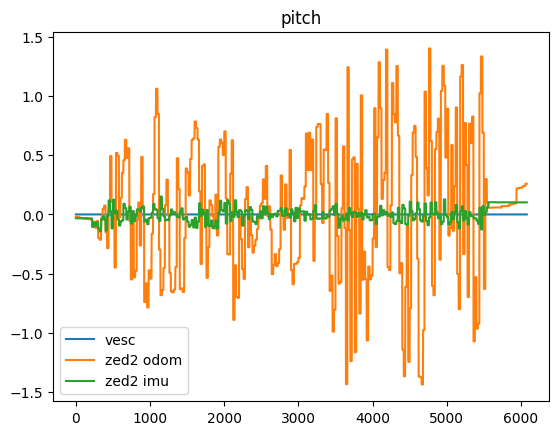

In [18]:
plt.plot(vesc_odom[:, 1], label="vesc")
plt.plot(zed2_odom[:, 1], label="zed2 odom")
plt.plot(zed2_imu[:, 1], label="zed2 imu")
plt.legend()
plt.title("pitch")

Text(0.5, 1.0, 'yaw')

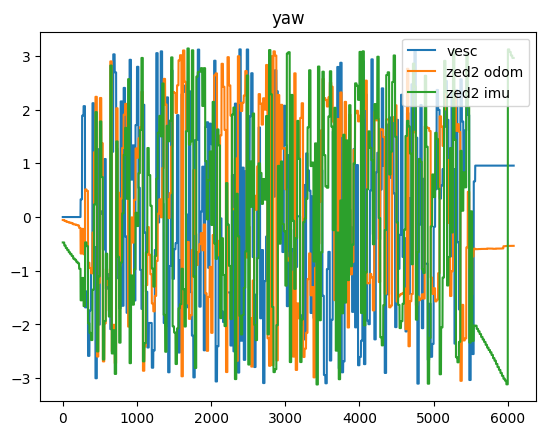

In [19]:
plt.plot(vesc_odom[:, 2], label="vesc")
plt.plot(zed2_odom[:, 2], label="zed2 odom")
plt.plot(zed2_imu[:, 2], label="zed2 imu")
plt.legend()
plt.title("yaw")